In [1]:
import pandas as pd

In [7]:
#import metled DF
melted_df = pd.read_csv('June_DB_melt.csv')

In [8]:
pca_df = pd.DataFrame()
pca_df['Meta'] = melted_df['Meta']
pca_df['condition'] = melted_df['condition']
pca_df['Trt'] = melted_df['condition'] + '_' + melted_df['Tube']
pca_df['Value'] = melted_df['Value']

In [9]:
pca_df.head()

,Meta,condition,Trt,Value
0,CT_1,VSV_JUN,VSV_JUN_Tube_1,0
1,CT_1,PBS_JUN,PBS_JUN_Tube_10,1
2,CT_1,BTV_JUN,BTV_JUN_Tube_10,0
3,CT_1,VSV_JUN,VSV_JUN_Tube_10,44
4,CT_1,VSV_JUN,VSV_JUN_Tube_2,21


In [10]:
# Assuming df is your DataFrame with columns: 'condition', 'metadata', 'value'
# Pivot the DataFrame to wide format, where metadata columns become features
pivot_df = pca_df.pivot(index='Trt', columns='Meta', values='Value')

# Reset index to make 'condition' a regular column
pivot_df = pivot_df.reset_index()

In [11]:
pivot_df.head()

Meta,Trt,CT_1,CT_10,CT_100,CT_101,CT_102,CT_103,CT_104,CT_105,CT_106,...,CT_90,CT_91,CT_92,CT_93,CT_94,CT_95,CT_96,CT_97,CT_98,CT_99
0,BTV_JUN_Tube_1,0,0,0,0,0,0,0,0,0,...,0,0,93,9,16,3,20,48,0,0
1,BTV_JUN_Tube_10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BTV_JUN_Tube_11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BTV_JUN_Tube_12,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BTV_JUN_Tube_13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
pivot_df['condition'] = pivot_df['Trt'].str.split('_').str[0]
pivot_df = pivot_df.drop(columns=['Trt'])

In [13]:
from sklearn.preprocessing import StandardScaler

features = pivot_df.columns.to_list()
features.remove('condition')

x = pivot_df.loc[:, features].values
y = pivot_df.loc[:,['condition']].values

x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, pivot_df[['condition']]], axis = 1)

In [16]:
finalDf['condition'].unique()

array(['BTV', 'CTRL', 'PBS', 'VSV'], dtype=object)

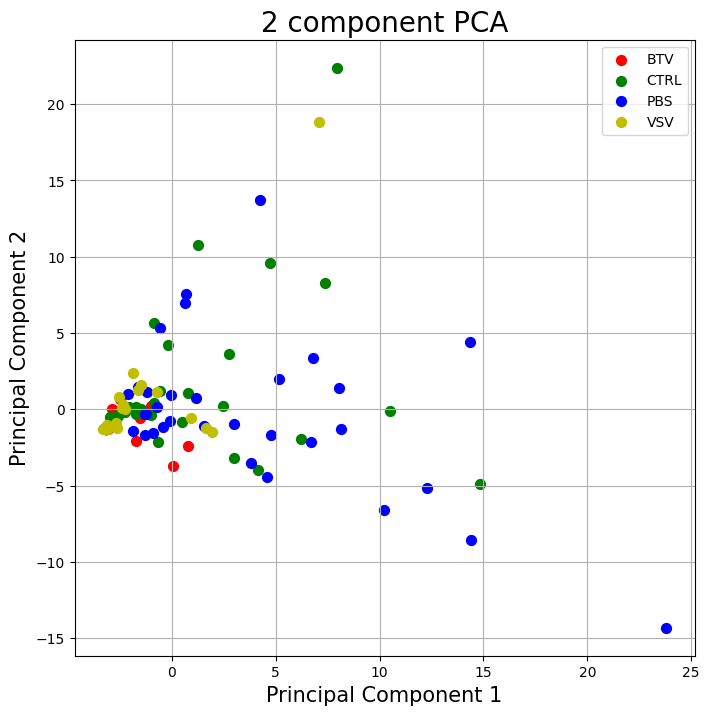

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cons = ['BTV', 'CTRL', 'PBS', 'VSV']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(cons,colors):
    indicesToKeep = finalDf['condition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(cons)
ax.grid()

In [18]:
pca.explained_variance_ratio_

array([0.11279644, 0.08693374])

In [31]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
#corr_matrix = pivot_df[features].corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()


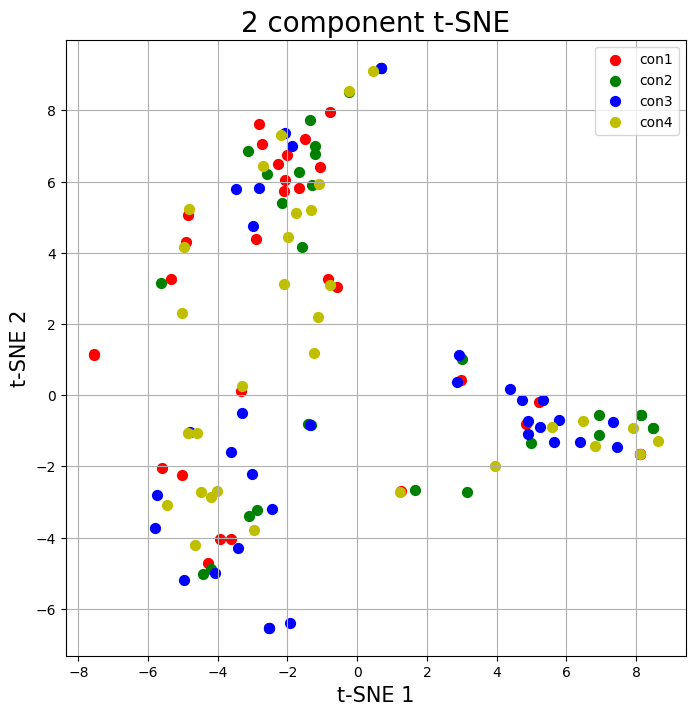

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(x)
tsne_df = pd.DataFrame(data = tsne_components, columns = ['t-SNE 1', 't-SNE 2'])
finalDf = pd.concat([tsne_df, pivot_df[['condition']]], axis = 1)

finalDf.head()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE 1', fontsize = 15)
ax.set_ylabel('t-SNE 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)

cons = ['con1', 'con2', 'con3', 'con4']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(cons,colors):
    indicesToKeep = finalDf['condition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 't-SNE 1']
               , finalDf.loc[indicesToKeep, 't-SNE 2']
               , c = color
               , s = 50)
ax.legend(cons)
ax.grid()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1 6 1 4]
 [3 2 2 0]
 [1 5 1 4]
 [2 2 2 3]]
              precision    recall  f1-score   support

        con1       0.14      0.08      0.11        12
        con2       0.13      0.29      0.18         7
        con3       0.17      0.09      0.12        11
        con4       0.27      0.33      0.30         9

    accuracy                           0.18        39
   macro avg       0.18      0.20      0.18        39
weighted avg       0.18      0.18      0.17        39

